In [1]:
#Basic imports
#import yfinance as yf
import matplotlib.pyplot as plt
import pickle
import datetime as dt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.statespace.sarimax import SARIMAX

/Users/Sam/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#load the data
tsla = pickle.load(open("data_h.pickle","rb"))
print(tsla.head(15))
print("\n Dataframe size = ",tsla.shape)
print("\n first index = ",tsla.index[0], "; last index = ", tsla.index[-1], "; second index = ",tsla.index[1])
tsla = tsla.drop(['High','Low','Close','Volume','Dividends','Stock Splits'],axis=1) #just gonna look at Open prices for now

                 Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2019-02-11  62.349998  63.700001  62.135998  63.167999  3140581          0   
2019-02-11  63.153004  63.338001  62.640003  62.902000   876534          0   
2019-02-11  62.935997  63.296001  62.730000  63.250000   801005          0   
2019-02-11  63.230000  63.412640  62.937798  62.956001   563722          0   
2019-02-11  62.996002  63.035999  62.690002  62.840981   513318          0   
2019-02-11  62.826836  62.890003  62.568001  62.796001   453119          0   
2019-02-11  62.770000  62.840004  62.459881  62.570000   642172          0   
2019-02-12  63.230000  63.599998  62.765636  62.964001  1590371          0   
2019-02-12  62.967999  63.430798  62.967999  63.340004   769540          0   
2019-02-12  63.323997  63.355999  62.828003  62.938000   627404          0   
2019-02-12  62.944317  62.984001  61.924000  62.289940  1011159 

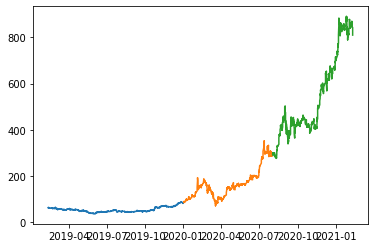

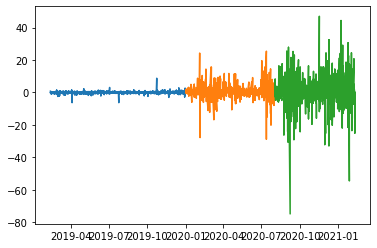

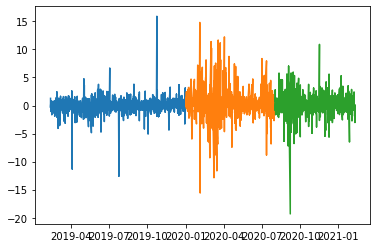

In [4]:
split_1 = dt.date(2020,1,1)
split_2 = dt.date(2020,8,1)

Dtsla = tsla['Open'].diff()
tsla_ret = 100*(np.log(tsla['Open'])).diff() #returns percentage


plt.figure(0)
plt.plot(tsla[:split_1])
plt.plot(tsla[split_1:split_2])
plt.plot(tsla[split_2:])

plt.figure(1)
plt.plot(Dtsla[:split_1])
plt.plot(Dtsla[split_1:split_2])
plt.plot(Dtsla[split_2:])

plt.figure(2)
plt.plot(tsla_ret[:split_1])
plt.plot(tsla_ret[split_1:split_2])
plt.plot(tsla_ret[split_2:])


plt.show()

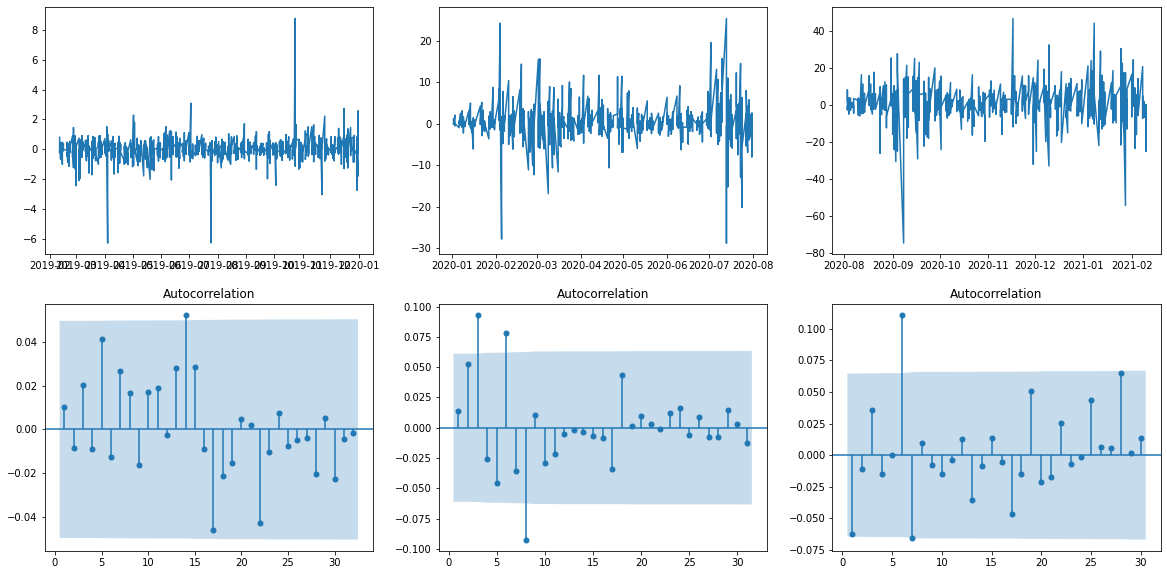

In [6]:
fig, axs = plt.subplots(2,3,figsize=(20,10))
axs[0,0].plot(Dtsla[:split_1])
axs[0,1].plot(Dtsla[split_1:split_2])
axs[0,2].plot(Dtsla[split_2:])

plot_acf(Dtsla[:split_1].dropna(),zero=False,ax=axs[1,0])
plot_acf(Dtsla[split_1:split_2].dropna(),zero=False,ax=axs[1,1])
plot_acf(Dtsla[split_2:].dropna(),zero=False,ax=axs[1,2])

plt.show()

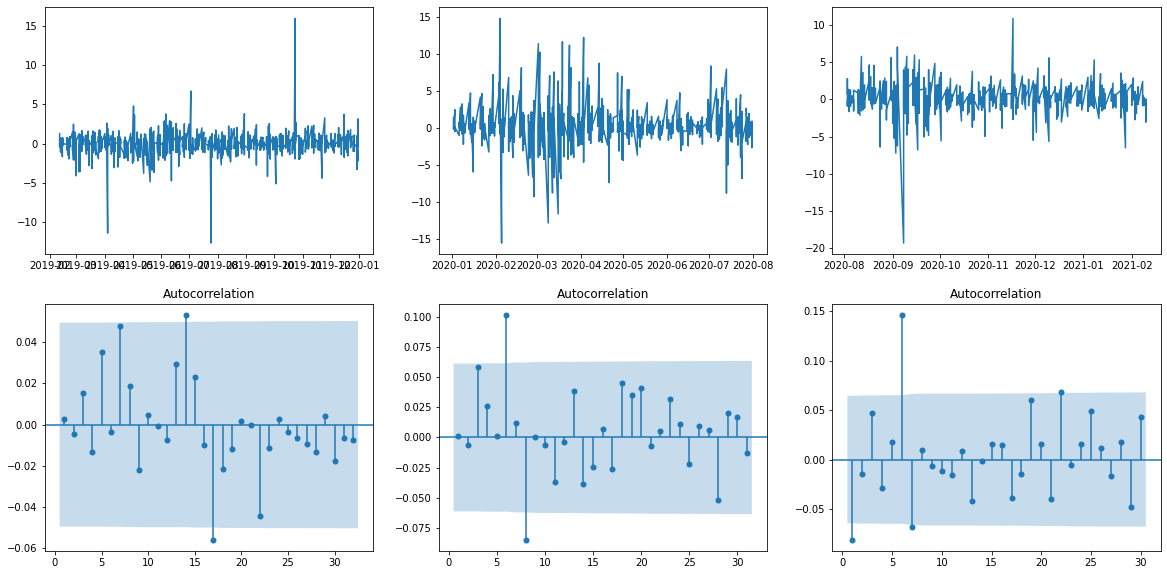

In [7]:
fig, axs = plt.subplots(2,3,figsize=(20,10))
axs[0,0].plot(tsla_ret[:split_1])
axs[0,1].plot(tsla_ret[split_1:split_2])
axs[0,2].plot(tsla_ret[split_2:])

plot_acf(tsla_ret[:split_1].dropna(),zero=False,ax=axs[1,0])
plot_acf(tsla_ret[split_1:split_2].dropna(),zero=False,ax=axs[1,1])
plot_acf(tsla_ret[split_2:].dropna(),zero=False,ax=axs[1,2])
plt.show()